In [1]:
import pandas as pd
from sklearn import feature_selection
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('../gtzan/processed/mgd_scenario5.csv')
X = df.iloc[:, list(range(2, 23))].to_numpy()
Y = df['label'].to_numpy()

In [9]:
selector = feature_selection.SelectKBest(feature_selection.f_classif, k=5)
selector.fit(X, Y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

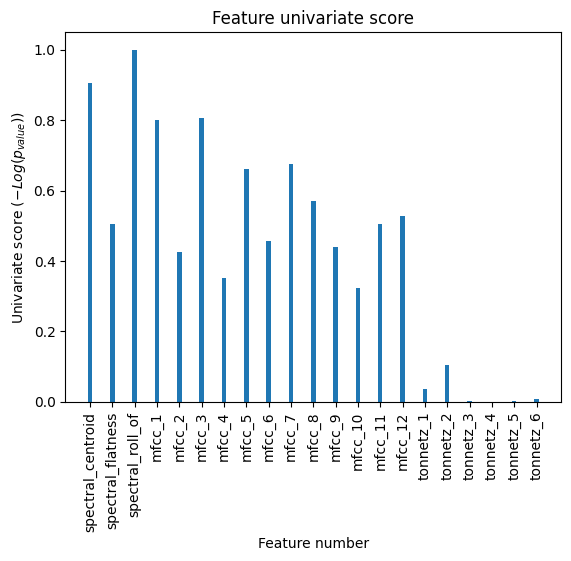

In [4]:
X_indices = np.arange(X.shape[-1])
X_labels = df.columns[2:23].to_list()


plt.figure(1)
plt.clf()
plt.bar(X_indices, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.xticks(X_indices, X_labels, rotation=90)
plt.show()